# 서브워드 토크나이저(Subword Tokenizer)
- 기계가 모르는 단어가 등장하면 그 단어를 단어 집합에 없는 단어란 의미에서 OOV(Out-Of-Vocabulary) 또는 UNK(Unknown Token)라고 표현
- 기계가 문제를 풀 때, 모르는 단어가 등장하면 주어진 문제를 푸는 것이 까다로워 지며, 모르는 단어로 인해 문제를 푸는 것이 까다로워지는 상황을 **OOV 문제**

<br>

- **서브워드 분리(Subword segmenation) 작업은 하나의 단어는 더 작은 단위의 의미있는 여러 서브워드들(Ex) birthplace = birth + place)의 조합으로 구성된 경우가 많기 때문에,**

  **하나의 단어를 여러 서브워드로 분리해서 단어를 인코딩 및 임베딩하겠다는 의도를 가진 전처리 작업**
- **이를 통해 OOV나 희귀 단어, 신조어와 같은 문제를 완화시킬 수 있음**
- **언어의 특성에 따라 영어권 언어나 한국어는 서브워드 분리를 시도했을 때 어느정도 의미있는 단위로 나누는 것이 가능**

<br>

<br>

## 바이트 페어 인코딩(Byte Pair Encoding, BPE)
- BPE(Byte pair encoding) 알고리즘은 1994년에 제안된 데이터 압축 알고리즘
- 후에 자연어 처리의 서브워드 분리 알고리즘으로 응용

<br>

### BPE의 작동 방법
- 아래와 같은 문자열이 주어졌을 때 BPE을 수행한다고 할 때,
```
aaabdaaabac
```

<br>

- **BPE은 기본적으로 연속적으로 가장 많이 등장한 글자의 쌍을 찾아서 하나의 글자로 병합하는 방식을 수행**
- 예를 들어 위의 문자열 중 가장 자주 등장하고 있는 바이트의 쌍(byte pair)은 'aa'

  이 'aa'라는 바이트의 쌍을 하나의 바이트인 'Z'로 치환

  ```
  ZabdZabac
  Z=aa

  ```

<br>

- 위 문자열 중에서 가장 많이 등장하고 있는 바이트의 쌍은 'ab'
  
  이 'ab'를 'Y'로 치환

  ```
  ZYdZYac
  Y=ab
  Z=aa
  ```

<br>

* 가장 많이 등장하고 있는 바이트의 쌍은 'ZY'
  
  이를 'X'로 치환

  ```
  XdXac
  X=ZY
  Y=ab
  Z=aa
  ```

<br>

### 자연어 처리에서의 BPE(Byte Pair Encoding)
논문 : https://arxiv.org/pdf/1508.07909.pdf

<br>

- **자연어 처리에서의 BPE는 서브워드 분리(subword segmentation) 알고리즘**
  - 기존에 있던 단어를 분리한다는 의미
- **글자(charcter) 단위에서 점차적으로 단어 집합(vocabulary)을 만들어 내는 Bottom up 방식의 접근을 사용**
- **우선 훈련 데이터에 있는 단어들을 모든 글자(chracters) 또는 유니코드(unicode) 단위로 단어 집합(vocabulary)를 만들고,**

  **가장 많이 등장하는 유니그램을 하나의 유니그램으로 통합**

<br>

- BPE을 자연어 처리에 사용한다고 제안한 논문(Sennrich et al. (2016))에서 이미 BPE의 코드를 공개

<br>

#### 기존의 접근
- 어떤 훈련 데이터로부터 각 단어들의 빈도수를 카운트했다고 할 때,

  각 단어와 각 단어의 빈도수가 기록되어져 있는 임의의 딕셔너리(dictionary)

  ```python
  # dictionary
  # 훈련 데이터에 있는 단어와 등장 빈도수
  low : 5, lower : 2, newest : 6, widest : 3
  ```

- 이 데이터에는 'low'란 단어가 5회 등장하였고, 'lower'란 단어는 2회 등장하였으며, 'newest'란 단어는 6회, 'widest'란 단어는 3회 등장하였다는 의미

- 딕셔너리로부터의 단어 집합(vocabulary)

  ```python
  # vocabulary
  low, lower, newest, widest
  ```

- 단어 집합은 중복을 배제한 단어들의 집합을 의미
- 기존에 배운 단어 집합의 정의라면, 이 훈련 데이터의 단어 집합에는 'low', 'lower', 'newest', 'widest'라는 4개의 단어가 존재
- **그리고 이 경우 테스트 과정에서 'lowest'란 단어가 등장한다면,**

  **기계는 이 단어를 학습한 적이 없으므로 해당 단어에 대해서 제대로 대응하지 못하는 OOV 문제가 발생**

<br>

#### BPE 알고리즘을 사용한 경우
* **위의 딕셔너리에 BPE를 적용시, 우선 딕셔너리의 모든 단어들을 글자(chracter) 단위로 분리**
- **딕셔너리는 자신 또한 업데이트되며,**

  **앞으로 단어 집합을 업데이트하기 위해 지속적으로 참고되는 참고 자료의 역할**

  ```python
  # dictionary
  l o w : 5,  l o w e r : 2,  n e w e s t : 6,  w i d e s t : 3
  ```

- **딕셔너리를 참고로 한 초기 단어 집합(vocabulary)은 글자 단위로 분리된 상태**

  ```python
  # vocabulary
  l, o, w, e, r, n, s, t, i, d
  ```

<br>

* **BPE의 특징은 알고리즘의 동작을 몇 회 반복(iteration)할 것인지를 사용자가 정한다는 점**
- **다시 말해 가장 빈도수가 높은 유니그램의 쌍을 하나의 유니그램으로 통합하는 과정을 총 반복**
  - 위의 딕셔너리에 따르면 빈도수가 현재 가장 높은 유니그램의 쌍은 (e, s)

<br>

**1회 - 딕셔너리를 참고로 하였을 때 빈도수가 9로 가장 높은 (e, s)의 쌍을 es로 통합**

```python
# dictionary update!
l o w : 5,
l o w e r : 2,
n e w es t : 6,
w i d es t : 3
```

```python
# vocabulary update!
l, o, w, e, r, n, s, t, i, d, es
```

<br>

**2회 - 빈도수가 9로 가장 높은 (es, t)의 쌍을 est로 통합**
```python
# dictionary update!
l o w : 5,
l o w e r : 2,
n e w est : 6,
w i d est : 3
```

```python
# vocabulary update!
l, o, w, e, r, n, s, t, i, d, es, est
```

<br>

**3회 - 빈도수가 7로 가장 높은 (l, o)의 쌍을 lo로 통합**
```python
# dictionary update!
lo w : 5,
lo w e r : 2,
n e w est : 6,
w i d est : 3
```

```python
# vocabulary update!
l, o, w, e, r, n, s, t, i, d, es, est, lo
```

<br>

**이와 같은 방식으로 총 10회 반복하였을 때 얻은 딕셔너리와 단어 집합**
```python
# dictionary update!
low : 5,
low e r : 2,
newest : 6,
widest : 3
```

```python
# vocabulary update!
l, o, w, e, r, n, s, t, i, d, es, est, lo, low, ne, new, newest, wi, wid, widest
```

- 이 경우 테스트 과정에서 'lowest'란 단어가 등장한다면, 기존에는 OOV에 해당되는 단어가 되었겠지만,

   **BPE 알고리즘을 사용한 위의 단어 집합에서는 더 이상 'lowest'는 OOV가 아님**

<br>

- **기계는 우선 'lowest'를 전부 글자 단위로 분할**

  **즉, 'l, o, w, e, s, t'**
  
  **그리고 기계는 위의 단어 집합을 참고로 하여 'low'와 'est'를 찾아냄**
  
  **즉, 'lowest'를 기계는 'low'와 'est' 두 단어로 인코딩**
  
  **그리고 이 두 단어는 둘 다 단어 집합에 있는 단어이므로 OOV가 아님**


  ![그림[1].png](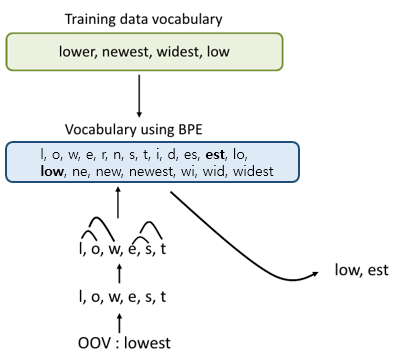)

<br>

### 코드 실습

In [1]:
import re, collections
from IPython.display import display, Markdown, Latex

- BPE시행 횟수

In [2]:
num_merges = 10

- BPE에 사용할 단어가 low, lower, newest, widest일 때, BPE의 입력으로 사용하는 실제 단어 집합
  - `</w>`는 단어의 맨 끝에 붙이는 특수 문자이며, 각 단어는 글자(character) 단위로 분리

In [3]:
dictionary = {'l o w </w>' : 5,
         'l o w e r </w>' : 2,
         'n e w e s t </w>':6,
         'w i d e s t </w>':3
         }

- 가장 빈도수가 높은 유니그램의 쌍을 하나의 유니그램으로 통합하는 과정으로 num_merges회 반복

In [4]:
def get_stats(dictionary):

    # 유니그램의 pair들의 빈도수를 카운트
    pairs = collections.defaultdict(int)

    for word, freq in dictionary.items():
        symbols = word.split()

        for i in range(len(symbols)-1):
            pairs[symbols[i],symbols[i+1]] += freq

    print('현재 pair들의 빈도수 :', dict(pairs))

    return pairs

In [5]:
def merge_dictionary(pair, v_in):

    v_out = {}
    bigram = re.escape(' '.join(pair))
    p = re.compile(r'(?<!\S)' + bigram + r'(?!\S)')

    for word in v_in:

        w_out = p.sub(''.join(pair), word)
        v_out[w_out] = v_in[word]

    return v_out

In [6]:
bpe_codes = {}
bpe_codes_reverse = {}

for i in range(num_merges):

    display(Markdown("### Iteration {}".format(i + 1)))
    pairs = get_stats(dictionary)
    best = max(pairs, key=pairs.get)
    dictionary = merge_dictionary(best, dictionary)

    bpe_codes[best] = i
    bpe_codes_reverse[best[0] + best[1]] = best

    print("new merge: {}".format(best))
    print("dictionary: {}".format(dictionary))

### Iteration 1

현재 pair들의 빈도수 : {('l', 'o'): 7, ('o', 'w'): 7, ('w', '</w>'): 5, ('w', 'e'): 8, ('e', 'r'): 2, ('r', '</w>'): 2, ('n', 'e'): 6, ('e', 'w'): 6, ('e', 's'): 9, ('s', 't'): 9, ('t', '</w>'): 9, ('w', 'i'): 3, ('i', 'd'): 3, ('d', 'e'): 3}
new merge: ('e', 's')
dictionary: {'l o w </w>': 5, 'l o w e r </w>': 2, 'n e w es t </w>': 6, 'w i d es t </w>': 3}


### Iteration 2

현재 pair들의 빈도수 : {('l', 'o'): 7, ('o', 'w'): 7, ('w', '</w>'): 5, ('w', 'e'): 2, ('e', 'r'): 2, ('r', '</w>'): 2, ('n', 'e'): 6, ('e', 'w'): 6, ('w', 'es'): 6, ('es', 't'): 9, ('t', '</w>'): 9, ('w', 'i'): 3, ('i', 'd'): 3, ('d', 'es'): 3}
new merge: ('es', 't')
dictionary: {'l o w </w>': 5, 'l o w e r </w>': 2, 'n e w est </w>': 6, 'w i d est </w>': 3}


### Iteration 3

현재 pair들의 빈도수 : {('l', 'o'): 7, ('o', 'w'): 7, ('w', '</w>'): 5, ('w', 'e'): 2, ('e', 'r'): 2, ('r', '</w>'): 2, ('n', 'e'): 6, ('e', 'w'): 6, ('w', 'est'): 6, ('est', '</w>'): 9, ('w', 'i'): 3, ('i', 'd'): 3, ('d', 'est'): 3}
new merge: ('est', '</w>')
dictionary: {'l o w </w>': 5, 'l o w e r </w>': 2, 'n e w est</w>': 6, 'w i d est</w>': 3}


### Iteration 4

현재 pair들의 빈도수 : {('l', 'o'): 7, ('o', 'w'): 7, ('w', '</w>'): 5, ('w', 'e'): 2, ('e', 'r'): 2, ('r', '</w>'): 2, ('n', 'e'): 6, ('e', 'w'): 6, ('w', 'est</w>'): 6, ('w', 'i'): 3, ('i', 'd'): 3, ('d', 'est</w>'): 3}
new merge: ('l', 'o')
dictionary: {'lo w </w>': 5, 'lo w e r </w>': 2, 'n e w est</w>': 6, 'w i d est</w>': 3}


### Iteration 5

현재 pair들의 빈도수 : {('lo', 'w'): 7, ('w', '</w>'): 5, ('w', 'e'): 2, ('e', 'r'): 2, ('r', '</w>'): 2, ('n', 'e'): 6, ('e', 'w'): 6, ('w', 'est</w>'): 6, ('w', 'i'): 3, ('i', 'd'): 3, ('d', 'est</w>'): 3}
new merge: ('lo', 'w')
dictionary: {'low </w>': 5, 'low e r </w>': 2, 'n e w est</w>': 6, 'w i d est</w>': 3}


### Iteration 6

현재 pair들의 빈도수 : {('low', '</w>'): 5, ('low', 'e'): 2, ('e', 'r'): 2, ('r', '</w>'): 2, ('n', 'e'): 6, ('e', 'w'): 6, ('w', 'est</w>'): 6, ('w', 'i'): 3, ('i', 'd'): 3, ('d', 'est</w>'): 3}
new merge: ('n', 'e')
dictionary: {'low </w>': 5, 'low e r </w>': 2, 'ne w est</w>': 6, 'w i d est</w>': 3}


### Iteration 7

현재 pair들의 빈도수 : {('low', '</w>'): 5, ('low', 'e'): 2, ('e', 'r'): 2, ('r', '</w>'): 2, ('ne', 'w'): 6, ('w', 'est</w>'): 6, ('w', 'i'): 3, ('i', 'd'): 3, ('d', 'est</w>'): 3}
new merge: ('ne', 'w')
dictionary: {'low </w>': 5, 'low e r </w>': 2, 'new est</w>': 6, 'w i d est</w>': 3}


### Iteration 8

현재 pair들의 빈도수 : {('low', '</w>'): 5, ('low', 'e'): 2, ('e', 'r'): 2, ('r', '</w>'): 2, ('new', 'est</w>'): 6, ('w', 'i'): 3, ('i', 'd'): 3, ('d', 'est</w>'): 3}
new merge: ('new', 'est</w>')
dictionary: {'low </w>': 5, 'low e r </w>': 2, 'newest</w>': 6, 'w i d est</w>': 3}


### Iteration 9

현재 pair들의 빈도수 : {('low', '</w>'): 5, ('low', 'e'): 2, ('e', 'r'): 2, ('r', '</w>'): 2, ('w', 'i'): 3, ('i', 'd'): 3, ('d', 'est</w>'): 3}
new merge: ('low', '</w>')
dictionary: {'low</w>': 5, 'low e r </w>': 2, 'newest</w>': 6, 'w i d est</w>': 3}


### Iteration 10

현재 pair들의 빈도수 : {('low', 'e'): 2, ('e', 'r'): 2, ('r', '</w>'): 2, ('w', 'i'): 3, ('i', 'd'): 3, ('d', 'est</w>'): 3}
new merge: ('w', 'i')
dictionary: {'low</w>': 5, 'low e r </w>': 2, 'newest</w>': 6, 'wi d est</w>': 3}


<br>

* e와 s의 쌍은 초기 단어 집합에서 총 9회 등장 $→$ 그렇기 때문에 es로 통합
* 그 다음으로는 es와 t의 쌍을,

  그 다음으로는 est와 `</w>`의 쌍을 통합
  
* **빈도수가 가장 높은 순서대로 통합하는 이 과정을 총 num_merges회 반복한 것**

In [7]:
print(bpe_codes)

{('e', 's'): 0, ('es', 't'): 1, ('est', '</w>'): 2, ('l', 'o'): 3, ('lo', 'w'): 4, ('n', 'e'): 5, ('ne', 'w'): 6, ('new', 'est</w>'): 7, ('low', '</w>'): 8, ('w', 'i'): 9}


<br>

#### OOV에 대처하기

In [10]:
def get_pairs(word):

    """단어의 기호 쌍 집합을 반환
    Word는 기호의 튜플로 표현 (symbol은 가변 길이 문자열)
    """

    pairs = set()
    prev_char = word[0]

    for char in word[1:]:
        pairs.add((prev_char, char))
        prev_char = char

    return pairs

In [11]:
def encode(orig):
    """연속적으로 적용되는 BPE 병합 작업 목록을 기반으로 단어를 인코딩"""

    word = tuple(orig) + ('</w>',)
    display(Markdown("__word split into characters:__ <tt>{}</tt>".format(word)))

    pairs = get_pairs(word)

    if not pairs:
        return orig

    iteration = 0
    while True:
        iteration += 1
        display(Markdown("__Iteration {}:__".format(iteration)))

        print("bigrams in the word: {}".format(pairs))
        bigram = min(pairs, key = lambda pair: bpe_codes.get(pair, float('inf')))
        print("candidate for merging: {}".format(bigram))
        if bigram not in bpe_codes:
            display(Markdown("__Candidate not in BPE merges, algorithm stops.__"))
            break
        first, second = bigram
        new_word = []
        i = 0

        while i < len(word):
            try:
                j = word.index(first, i)
                new_word.extend(word[i:j])
                i = j
            except:
                new_word.extend(word[i:])
                break

            if word[i] == first and i < len(word)-1 and word[i+1] == second:
                new_word.append(first+second)
                i += 2
            else:
                new_word.append(word[i])
                i += 1

        new_word = tuple(new_word)
        word = new_word
        print("word after merging: {}".format(word))

        if len(word) == 1:
            break
        else:
            pairs = get_pairs(word)

    # 특별 토큰인 </w>는 출력하지 않음
    if word[-1] == '</w>':
        word = word[:-1]
    elif word[-1].endswith('</w>'):
        word = word[:-1] + (word[-1].replace('</w>',''),)

    return word

<br>

- 현재 서브워드 단어집합에는 'lo'가 존재하므로, 'lo'는 유지하고 'k'와 'i'는 분리

In [12]:
encode("loki")

__word split into characters:__ <tt>('l', 'o', 'k', 'i', '</w>')</tt>

__Iteration 1:__

bigrams in the word: {('o', 'k'), ('k', 'i'), ('l', 'o'), ('i', '</w>')}
candidate for merging: ('l', 'o')
word after merging: ('lo', 'k', 'i', '</w>')


__Iteration 2:__

bigrams in the word: {('lo', 'k'), ('k', 'i'), ('i', '</w>')}
candidate for merging: ('lo', 'k')


__Candidate not in BPE merges, algorithm stops.__

('lo', 'k', 'i')

<br>

- 현재 서브워드 단어집합에 'low'와 'est'가 존재하므로, 'low'와 'est'를 분리

In [13]:
encode("lowest")

__word split into characters:__ <tt>('l', 'o', 'w', 'e', 's', 't', '</w>')</tt>

__Iteration 1:__

bigrams in the word: {('e', 's'), ('t', '</w>'), ('l', 'o'), ('w', 'e'), ('s', 't'), ('o', 'w')}
candidate for merging: ('e', 's')
word after merging: ('l', 'o', 'w', 'es', 't', '</w>')


__Iteration 2:__

bigrams in the word: {('t', '</w>'), ('w', 'es'), ('l', 'o'), ('es', 't'), ('o', 'w')}
candidate for merging: ('es', 't')
word after merging: ('l', 'o', 'w', 'est', '</w>')


__Iteration 3:__

bigrams in the word: {('est', '</w>'), ('w', 'est'), ('l', 'o'), ('o', 'w')}
candidate for merging: ('est', '</w>')
word after merging: ('l', 'o', 'w', 'est</w>')


__Iteration 4:__

bigrams in the word: {('w', 'est</w>'), ('l', 'o'), ('o', 'w')}
candidate for merging: ('l', 'o')
word after merging: ('lo', 'w', 'est</w>')


__Iteration 5:__

bigrams in the word: {('w', 'est</w>'), ('lo', 'w')}
candidate for merging: ('lo', 'w')
word after merging: ('low', 'est</w>')


__Iteration 6:__

bigrams in the word: {('low', 'est</w>')}
candidate for merging: ('low', 'est</w>')


__Candidate not in BPE merges, algorithm stops.__

('low', 'est')

<br>

* **어떤 서브워드도 존재하지 않는 'highing'의 경우 모든 알파벳이 분리**

In [14]:
encode("highing")

__word split into characters:__ <tt>('h', 'i', 'g', 'h', 'i', 'n', 'g', '</w>')</tt>

__Iteration 1:__

bigrams in the word: {('n', 'g'), ('g', 'h'), ('i', 'g'), ('h', 'i'), ('g', '</w>'), ('i', 'n')}
candidate for merging: ('n', 'g')


__Candidate not in BPE merges, algorithm stops.__

('h', 'i', 'g', 'h', 'i', 'n', 'g')

<br>

### WordPiece Tokenizer
논문 : https://static.googleusercontent.com/media/research.google.com/ko//pubs/archive/37842.pdf

구글이 위 WordPiece Tokenizer를 변형하여 번역기에 사용했다는 논문 : https://arxiv.org/pdf/1609.08144.pdf

<br>

* WordPiece Tokenizer은 BPE의 변형 알고리즘
* **해당 알고리즘은 BPE가 빈도수에 기반하여 가장 많이 등장한 쌍을 병합하는 것과는 달리, 병합되었을 때 코퍼스의 우도(Likelihood)를 가장 높이는 쌍을 병합**

```
수행하기 이전의 문장: Jet makers feud over seat width with big orders at stake

WordPiece Tokenizer를 수행한 결과(wordpieces): _J et _makers _fe ud _over _seat _width _with _big _orders _at _stake
```

* Jet는 J와 et로 나누어졌으며, feud는 fe와 ud로 나누어짐
* WordPiece Tokenizer는 모든 단어의 맨 앞에 \_를 붙이고, 단어는 서브 워드(subword)로 통계에 기반하여 띄어쓰기로 분리

  (언더바 _는 문장 복원을 위한 장치)

- WordPiece Tokenizer의 결과로 나온 문장을 보면,
  
  Jet → \_J et와 같이 기존에 없던 띄어쓰기가 추가되어 서브 워드(subwords)들을 구분하는 구분자 역할
  
  기존에 있던 띄어쓰기와 구분자 역할의 띄어쓰기는 단어들 앞에 붙은 언더바 _
  
  WordPiece Tokenizer이 수행된 결과로부터 다시 수행 전의 결과로 돌리는 방법은 현재 있는 모든 띄어쓰기를 전부 제거하고, 언더바를 띄어쓰기로 변경

- 이 알고리즘은 유명 딥 러닝 모델 BERT를 훈련하기 위해서 사용되기도 함

<br>

### Unigram Language Model Tokenizer
논문 : https://arxiv.org/pdf/1804.10959.pdf

<br>

* **유니그램 언어 모델 토크나이저는 각각의 서브워드들에 대해서 손실(loss)을 계산**
- **여기서 서브 단어의 손실이라는 것은 해당 서브워드가 단어 집합에서 제거되었을 경우, 코퍼스의 우도(Likelihood)가 감소하는 정도**
* **측정된 서브워드들을 손실의 정도로 정렬하여, 최악의 영향을 주는 10~20%의 토큰을 제거**

  **이를 원하는 단어 집합의 크기에 도달할 때까지 반복**

<br>

<br>

## 센텐스피스(SentencePiece)
논문 : https://arxiv.org/pdf/1808.06226.pdf

센텐스피스 깃허브 : https://github.com/google/sentencepiece

<br>

- 구글의 센텐스피스(Sentencepiece) : 내부 단어 분리를 위한 유용한 패키지,
- 구글은 BPE 알고리즘과 Unigram Language Model Tokenizer를 구현한 센텐스피스를 깃허브에 공개

<br>

- 내부 단어 분리 알고리즘을 사용하기 위해서, 데이터에 단어 토큰화를 먼저 진행한 상태여야 한다면,

   이 단어 분리 알고리즘을 모든 언어에 사용하는 것은 쉽지 않음
  - 영어와 달리 한국어와 같은 언어는 단어 토큰화부터가 쉽지 않기 때문
- **이런 사전 토큰화 작업(pretokenization)없이 전처리를 하지 않은 데이터(raw data)에 바로 단어 분리 토크나이저를 사용할 수 있다면,**

  **이 토크나이저는 그 어떤 언어에도 적용할 수 있는 토크나이저**

- **센텐스피스는 사전 토큰화 작업없이 단어 분리 토큰화를 수행하므로 언어에 종속되지 않음**

```python
pip install sentencepiece
```

<br>

### IMDB 리뷰 토큰화

In [24]:
import sentencepiece as spm
import pandas as pd
import urllib.request
import csv

In [17]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/LawrenceDuan/IMDb-Review-Analysis/master/IMDb_Reviews.csv", filename="IMDb_Reviews.csv")

('IMDb_Reviews.csv', <http.client.HTTPMessage at 0x7feeae1a7e20>)

In [20]:
train_df = pd.read_csv('IMDb_Reviews.csv')
train_df.head()

,review,sentiment
0,My family and I normally do not watch local mo...,1
1,"Believe it or not, this was at one time the wo...",0
2,"After some internet surfing, I found the ""Home...",0
3,One of the most unheralded great works of anim...,1
4,"It was the Sixties, and anyone with long hair ...",0


In [21]:
print('리뷰 개수 :',len(train_df))

리뷰 개수 : 50000


<br>

* 센텐스피스의 입력으로 사용하기 위해서 데이터프레임을 txt 파일로 저장

In [25]:
with open('imdb_review.txt', 'w', encoding='utf8') as f:
    f.write('\n'.join(train_df['review']))

<br>

#### 센텐스피스로 단어 집합과 각 단어에 고유한 정수를 부여

<br>

#### `sentencepiece.SentencePieceTrainer.Train()`
- `input` : 학습시킬 파일
- `model_prefix` : 만들어질 모델 이름
- `vocab_size` : 단어 집합의 크기
- `model_type` : 사용할 모델 (`unigram(default)`, `bpe`, `char`, `word`)
- `max_sentence_length` : 문장의 최대 길이
- `pad_id, pad_piece` : pad token id, 값
- `unk_id, unk_piece` : unknown token id, 값
- `bos_id, bos_piece` : begin of sentence token id, 값
- `eos_id, eos_piece` : end of sequence token id, 값
- `user_defined_symbols` : 사용자 정의 토큰

In [27]:
spm.SentencePieceTrainer.Train('--input=imdb_review.txt --model_prefix=imdb --vocab_size=5000 --model_type=bpe --max_sentence_length=9999')

<br>

* vocab 생성이 완료되면 imdb.model, imdb.vocab 파일 두개가 생성
- vocab 파일에서 학습된 서브워드들을 확인
- 단어 집합의 크기를 확인하기 위해 vocab 파일을 데이터프레임에 저장

In [31]:
vocab_list = pd.read_csv('imdb.vocab', sep='\t', header=None, quoting=csv.QUOTE_NONE)
vocab_list.head()

,0,1
0,<unk>,0
1,<s>,0
2,</s>,0
3,▁t,0
4,▁a,-1


- vocab_size의 인자를 통해 단어 집합의 크기를 5,000개로 제한하였으므로 단어 집합의 크기는 5,000개

In [29]:
len(vocab_list)

5000

<br>

- model 파일을 로드하여 단어 시퀀스를 정수 시퀀스로 바꾸는 인코딩 작업이나 반대로 변환하는 디코딩 작업가능

<br>

#### `sentencepiece.SentencePieceProcessor()` : sentencepiece 전처리 객체 생성

In [30]:
sp = spm.SentencePieceProcessor()
vocab_file = "imdb.model"
sp.load(vocab_file)

True

<br>

#### `SentencePieceProcessor객체.encode_as_pieces(문자열)` : 문장을 입력하면 서브 워드 시퀀스로 변환

<br>

#### `SentencePieceProcessor객체.encode_as_ids(문자열)` : 문장을 입력하면 정수 시퀀스로 변환




In [32]:
lines = [
  "I didn't at all think of it this way.",
  "I have waited a long time for someone to film"
]

for line in lines:
  print(line)
  print(sp.encode_as_pieces(line))
  print(sp.encode_as_ids(line))
  print()

I didn't at all think of it this way.
['▁I', '▁didn', "'", 't', '▁at', '▁all', '▁think', '▁of', '▁it', '▁this', '▁way', '.']
[41, 624, 4950, 4926, 139, 170, 378, 30, 58, 73, 413, 4945]

I have waited a long time for someone to film
['▁I', '▁have', '▁wa', 'ited', '▁a', '▁long', '▁time', '▁for', '▁someone', '▁to', '▁film']
[41, 142, 1364, 1121, 4, 668, 285, 93, 1079, 33, 91]



<br>

#### `SentencePieceProcessor객체.GetPieceSize()` : 단어 집합의 크기를 확인


In [33]:
sp.GetPieceSize()

5000

<br>

#### `SentencePieceProcessor객체.idToPiece(정수)` : 정수로부터 맵핑되는 서브 워드로 변환


In [34]:
sp.IdToPiece(430)

'▁character'

<br>

#### `SentencePieceProcessor객체.PieceToId(서브워드)` : 서브워드로부터 맵핑되는 정수로 변환


In [35]:
sp.PieceToId('▁character')

430

<br>

#### `SentencePieceProcessor객체.DecodeIds(정수 시퀀스)` : 정수 시퀀스로부터 문장으로 변환


In [36]:
sp.DecodeIds([41, 141, 1364, 1120, 4, 666, 285, 92, 1078, 33, 91])

'Iul wa fall aold timeooland to film'

<br>

#### `SentencePieceProcessor객체.DecodePieces(정수 시퀀스)` : 서브워드 시퀀스로부터 문장으로 변환


In [37]:
sp.DecodePieces(['▁I', '▁have', '▁wa', 'ited', '▁a', '▁long', '▁time', '▁for', '▁someone', '▁to', '▁film'])

'I have waited a long time for someone to film'

<br>

#### `SentencePieceProcessor객체.encode(문자열, out_type)` : 문장으로부터 인자값에 따라서 정수 시퀀스 또는 서브워드 시퀀스로 변환 가능


In [38]:
print(sp.encode('I have waited a long time for someone to film', out_type=str))
print(sp.encode('I have waited a long time for someone to film', out_type=int))

['▁I', '▁have', '▁wa', 'ited', '▁a', '▁long', '▁time', '▁for', '▁someone', '▁to', '▁film']
[41, 142, 1364, 1121, 4, 668, 285, 93, 1079, 33, 91]


<br>

### 네이버 영화 리뷰 토큰화

In [39]:
import pandas as pd
import sentencepiece as spm
import urllib.request
import csv

In [40]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt", filename="ratings.txt")

('ratings.txt', <http.client.HTTPMessage at 0x7feeadb86980>)

In [41]:
naver_df = pd.read_table('ratings.txt')
naver_df[:5]

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1


In [42]:
print('리뷰 개수 :',len(naver_df)) # 리뷰 개수 출력

리뷰 개수 : 200000


- 결측값 전처리

In [43]:
print(naver_df.isnull().values.any())

True


In [44]:
naver_df = naver_df.dropna(how = 'any') # Null 값이 존재하는 행 제거
print(naver_df.isnull().values.any()) # Null 값이 존재하는지 확인

False


In [45]:
print('리뷰 개수 :',len(naver_df)) # 리뷰 개수 출력

리뷰 개수 : 199992


<br>

* 샘플을 naver_review.txt 파일에 저장한 후에 센텐스피스를 통해 단어 집합을 생성

In [46]:
with open('naver_review.txt', 'w', encoding='utf8') as f:
    f.write('\n'.join(naver_df['document']))

In [47]:
spm.SentencePieceTrainer.Train('--input=naver_review.txt --model_prefix=naver --vocab_size=5000 --model_type=bpe --max_sentence_length=9999')

In [48]:
vocab_list = pd.read_csv('naver.vocab', sep='\t', header=None, quoting=csv.QUOTE_NONE)
vocab_list[:10]

,0,1
0,<unk>,0
1,<s>,0
2,</s>,0
3,..,0
4,영화,-1
5,▁영화,-2
6,▁이,-3
7,▁아,-4
8,...,-5
9,ᄏᄏ,-6


In [49]:
len(vocab_list)

5000

<br>


In [50]:
sp = spm.SentencePieceProcessor()
vocab_file = "naver.model"
sp.load(vocab_file)

True

In [51]:
lines = [
  "뭐 이딴 것도 영화냐.",
  "진짜 최고의 영화입니다 ㅋㅋ",
]

for line in lines:
  print(line)
  print(sp.encode_as_pieces(line))
  print(sp.encode_as_ids(line))
  print()

뭐 이딴 것도 영화냐.
['▁뭐', '▁이딴', '▁것도', '▁영화냐', '.']
[136, 970, 1299, 2593, 3276]

진짜 최고의 영화입니다 ㅋㅋ
['▁진짜', '▁최고의', '▁영화입니다', '▁ᄏᄏ']
[54, 204, 825, 121]



<br>

- 단어 집합의 크기를 확인

In [52]:
sp.GetPieceSize()

5000

- 정수로부터 맵핑되는 서브 워드로 변환

In [53]:
sp.IdToPiece(4)

'영화'

* 서브워드로부터 맵핑되는 정수로 변환

In [54]:
sp.PieceToId('영화')

4

* 정수 시퀀스로부터 문장으로 변환

In [55]:
sp.DecodeIds([54, 200, 821, 85])

'진짜 원 산~~'

* 서브워드 시퀀스로부터 문장으로 변환

In [56]:
sp.DecodePieces(['▁진짜', '▁최고의', '▁영화입니다', '▁ᄏᄏ'])

'진짜 최고의 영화입니다 ᄏᄏ'

In [57]:
print(sp.encode('진짜 최고의 영화입니다 ㅋㅋ', out_type=str))
print(sp.encode('진짜 최고의 영화입니다 ㅋㅋ', out_type=int))

['▁진짜', '▁최고의', '▁영화입니다', '▁ᄏᄏ']
[54, 204, 825, 121]
